In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
import numpy as np

In [66]:
df_evol = pd.read_csv('../data/constraint/evolutionary/evol_constraint.txt', sep='\t', skiprows=1)
df_evol = df_evol[~df_evol.gene_name.isna()].copy()
df_evol['gene_name'] = df_evol.gene_name.str.slice(start=1, stop=-1)


df_gnomad = pd.read_csv('../data/constraint/zscores_hgnc.tsv', sep='\t')
combined_constraint = df_gnomad.merge(df_evol, left_on='hgnc_symbol', right_on='gene_name', how='inner')
gnomad_mouse_lethals= pd.read_csv('../data/essential_genes/mouse_het_lethal_human_genes.txt',sep='\t', header=None)[0]
combined_constraint['mouse_het_lethal'] = combined_constraint.gene_name.isin(gnomad_mouse_lethals)
combined_constraint['oeuf_lof'] = pd.to_numeric(combined_constraint.oeuf_lof, errors='coerce')
combined_constraint['oeuf_lof'].fillna(3, inplace=True)
combined_constraint['z_max'] = combined_constraint[['z_mis_pphen','z_lof']].max(axis=1)

/home/andrew/miniconda3/envs/variants/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (27,32) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [67]:
gpcrs = pd.read_csv('../data/families/gpcr_genes_human_gpcrdb.tsv',sep='\t')
combined_constraint['is_gpcr'] = combined_constraint.gene_name.isin(gpcrs.gene)
combined_constraint.is_gpcr.sum()

391

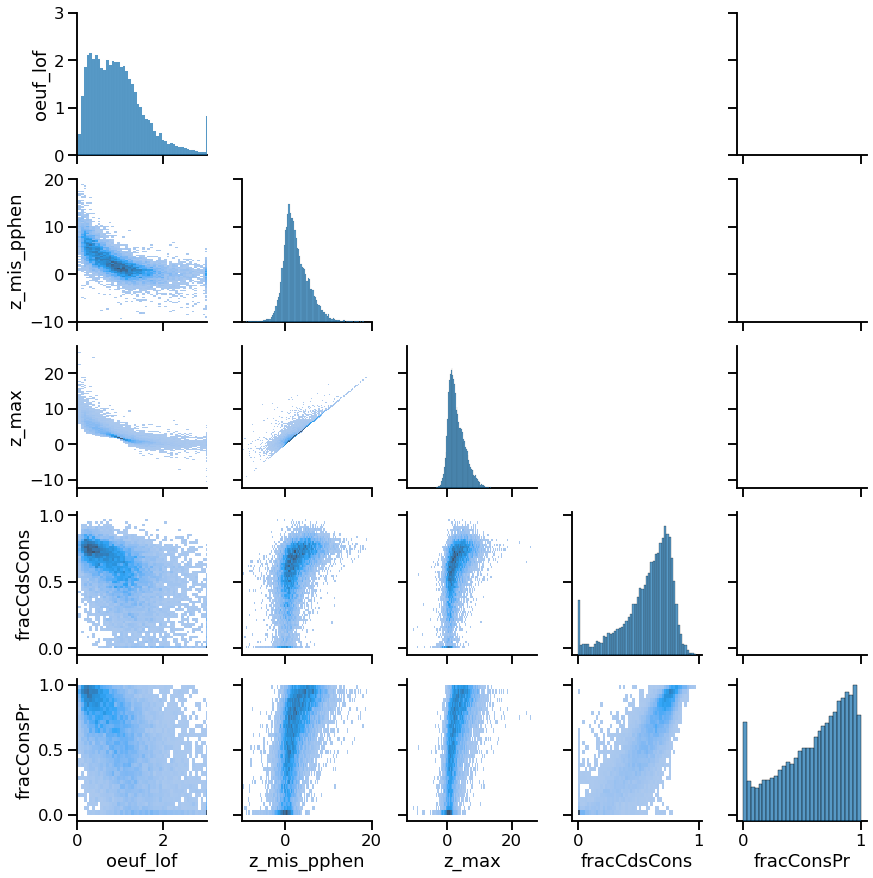

In [45]:
sns.set_context('talk')
g = sns.PairGrid(combined_constraint, vars=['oeuf_lof', 'z_mis_pphen', 'z_max', 'fracCdsCons', 'fracConsPr'])
g.map_diag(sns.histplot)
g.map_lower(sns.histplot)
g.axes[0, 1].set_ylim(0, 3)
g.axes[1, 0].set_xlim(0, 3)
g.axes[2, 1].set_xlim(-10, 20)
g.axes[1, 2].set_ylim(-10, 20)
for ax in g.axes[np.triu_indices(4, k=1)]:
    ax.set_visible(False)

In [77]:
combined_constraint.melt(id_vars = ['gene_name','is_gpcr','mouse_het_lethal'], value_vars=['oeuf_lof', 'z_mis_pphen', 'z_max', 'fracCdsCons', 'fracConsPr'])

,gene_name,is_gpcr,mouse_het_lethal,variable,value
0,A1BG,False,False,oeuf_lof,1.208072
1,A1CF,False,False,oeuf_lof,0.879681
2,A2M,False,False,oeuf_lof,0.544344
3,A2ML1,False,False,oeuf_lof,0.951803
4,A3GALT2,False,False,oeuf_lof,1.833346
...,...,...,...,...,...
92290,ZYG11A,False,False,fracConsPr,0.762281
92291,ZYG11B,False,False,fracConsPr,0.971365
92292,ZYX,False,False,fracConsPr,0.642234
92293,ZZEF1,False,False,fracConsPr,0.725523


In [94]:
combined_constraint.oeuf_lof.describe()

count    18459.000000
mean         1.128314
std          2.167898
min          0.030435
25%          0.486879
50%          0.893237
75%          1.336651
max        125.976967
Name: oeuf_lof, dtype: float64

In [97]:
np.minimum(combined_constraint.oeuf_lof, 3).describe()

count    18459.000000
mean         1.018984
std          0.698262
min          0.030435
25%          0.486879
50%          0.893237
75%          1.336651
max          3.000000
Name: oeuf_lof, dtype: float64

/home/andrew/miniconda3/envs/variants/lib/python3.8/site-packages/seaborn/categorical.py:3793: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)


(-7.0, 12.0)

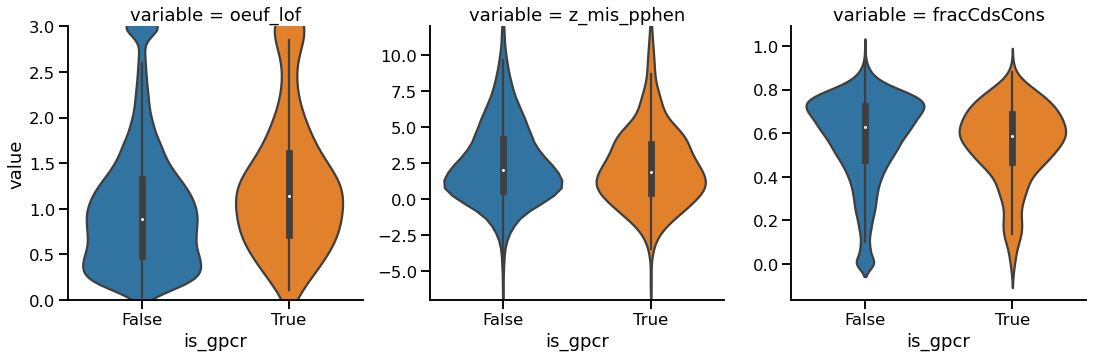

In [98]:
combined_constraint['oeuf_lof'] = np.minimum(combined_constraint['oeuf_lof'], 3)
g = sns.catplot(data=combined_constraint.melt(id_vars = ['gene_name','is_gpcr','mouse_het_lethal'], value_vars=['oeuf_lof', 'z_mis_pphen','fracCdsCons']),
            x = 'is_gpcr',y = 'value', col='variable',kind='violin',sharey=False,sharex=False)

g.axes[0][0].set_ylim(0, 3)
g.axes[0][1].set_ylim(-7, 12)

/home/andrew/miniconda3/envs/variants/lib/python3.8/site-packages/seaborn/categorical.py:3793: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)


(-7.0, 12.0)

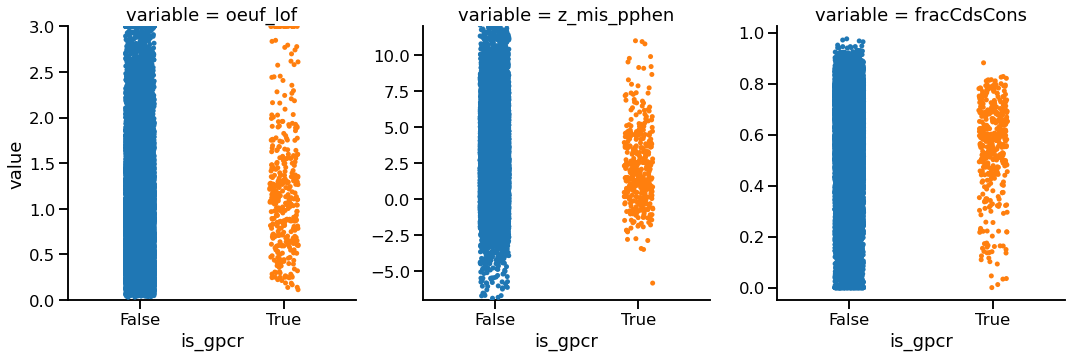

In [89]:
g = sns.catplot(data=combined_constraint.melt(id_vars = ['gene_name','is_gpcr','mouse_het_lethal'], value_vars=['oeuf_lof', 'z_mis_pphen','fracCdsCons']),
            x = 'is_gpcr',y = 'value', col='variable',kind='strip',sharey=False,sharex=False)

g.axes[0][0].set_ylim(0, 3)
g.axes[0][1].set_ylim(-7, 12)

<AxesSubplot:xlabel='is_gpcr', ylabel='fracCdsCons'>

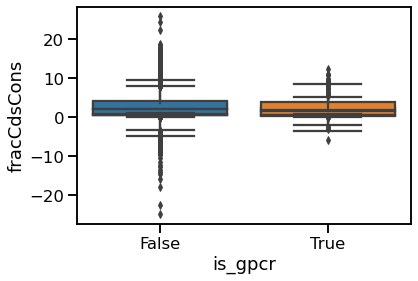

In [73]:
sns.catplot(data=combined_constraint, x='is_gpcr', y='z_lof')
sns.boxplot(data=combined_constraint, x='is_gpcr', y='z_mis_pphen')
sns.boxplot(data=combined_constraint, x='is_gpcr', y='fracCdsCons')

IndexError: index 3 is out of bounds for axis 1 with size 3

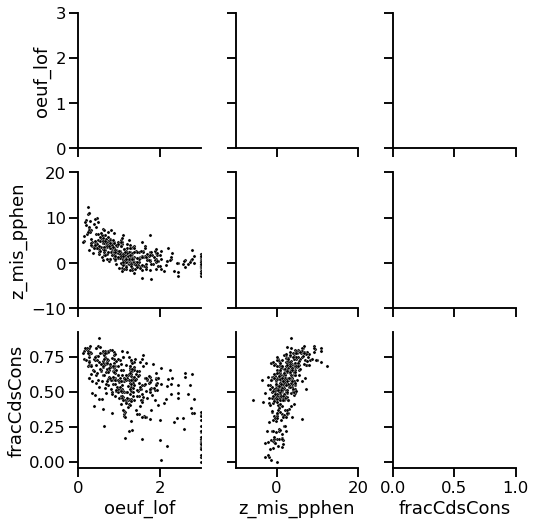

In [68]:
sns.set_context('talk')
g = sns.PairGrid(combined_constraint[combined_constraint.is_gpcr], vars=['oeuf_lof', 'z_mis_pphen', 'fracCdsCons'])
g.map_lower(sns.scatterplot,s=10, color='black')
g.axes[0, 1].set_ylim(0, 3)
g.axes[1, 0].set_xlim(0, 3)
g.axes[2, 1].set_xlim(-10, 20)
g.axes[1, 2].set_ylim(-10, 20)
for ax in g.axes[np.triu_indices(4, k=1)]:
    ax.set_visible(False)

In [46]:
combined_constraint[['oeuf_lof','z_mis_pphen','z_max','fracCdsCons','fracConsPr']].corr(method='spearman')

,oeuf_lof,z_mis_pphen,z_max,fracCdsCons,fracConsPr
oeuf_lof,1.000000,-0.769087,-0.902135,-0.563782,-0.557770
z_mis_pphen,-0.769087,1.000000,0.910386,0.568763,0.557058
z_max,-0.902135,0.910386,1.000000,0.567136,0.555345
fracCdsCons,-0.563782,0.568763,0.567136,1.000000,0.861237
fracConsPr,-0.557770,0.557058,0.555345,0.861237,1.000000


z_mis_pphen 0.7286104241778311
oeuf_lof_r 0.7571024737924545
z_max 0.7422572211259045
fracCdsCons 0.6813542716148067
fracConsPr 0.6620826012983733


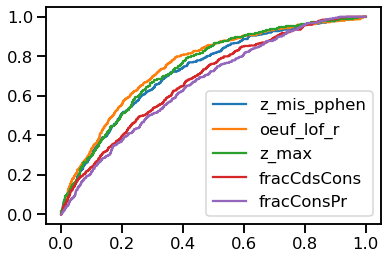

In [55]:
from sklearn.metrics import roc_auc_score, roc_curve

combined_constraint['oeuf_lof_r'] = -combined_constraint.oeuf_lof
for metric in ['z_mis_pphen','oeuf_lof_r','z_max','fracCdsCons','fracConsPr']:
    print(metric, roc_auc_score(combined_constraint.mouse_het_lethal, combined_constraint[metric].fillna(0)))
    fpr, tpr, _ = roc_curve(combined_constraint.mouse_het_lethal, combined_constraint[metric].fillna(0))
    plt.plot(fpr, tpr, label = metric)
plt.legend()

In [60]:
from patsy import dmatrix
from statsmodels.discrete.discrete_model import Logit
combined_constraint['mouse_het_lethal'] = combined_constraint.mouse_het_lethal.astype(int)
form = 'mouse_het_lethal ~ z_mis_pphen + oeuf_lof_r + fracCdsCons + fracConsPr'
mod= Logit.from_formula(form, data = combined_constraint.fillna(0))
res = mod.fit()
print(res.summary())

print('Logistic regression', roc_auc_score(combined_constraint.mouse_het_lethal, res.predict()))

Optimization terminated successfully.
         Current function value: 0.095346
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:       mouse_het_lethal   No. Observations:                18459
Model:                          Logit   Df Residuals:                    18454
Method:                           MLE   Df Model:                            4
Date:                Mon, 22 May 2023   Pseudo R-squ.:                 0.08551
Time:                        16:56:54   Log-Likelihood:                -1760.0
converged:                       True   LL-Null:                       -1924.6
Covariance Type:            nonrobust   LLR p-value:                 5.612e-70
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -4.5580      0.366    -12.465      0.000      -5.275      -3.841
z_mis_pphen     0.1005   

In [25]:
import json

In [ ]:
r = requests.get('https://api.genome.ucsc.edu/getData/track?genome=Homo_sapiens&hubUrl=https://cgl.gi.ucsc.edu/data/cactus/241-mammalian-2020v2-hub/hub.txt&track=phyloP241&chrom=chr10&start=114043866&end=114046904')


In [33]:
with open('../adrb2_phylop_track.json','r') as fid:
    adrb1_phylop_track = json.load(fid)

In [34]:
adrb1_phylop_track = pd.DataFrame(adrb1_phylop_track['phyloP241']['chr10'])

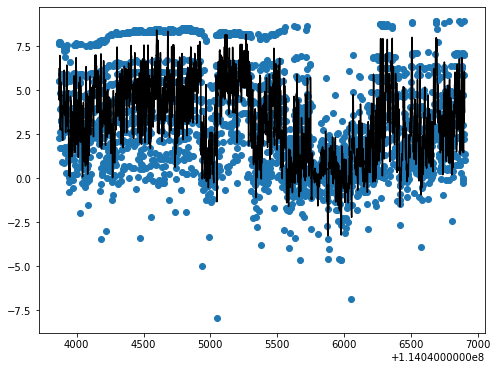

In [51]:
plt.subplots(figsize=(8,6))
plt.scatter(adrb1_phylop_track.start, adrb1_phylop_track.value)
plt.plot(adrb1_phylop_track.start, adrb1_phylop_track.rolling(3).value.mean(), zorder = 10, color='k')